In [240]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [241]:
df = pd.read_csv('../data/winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [243]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Data Cleaning

In [244]:
# Check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

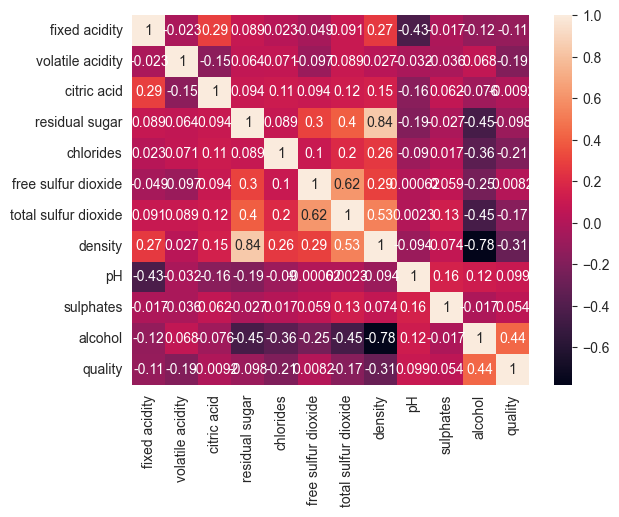

In [245]:
# Check correlation
sns.heatmap(df.corr(), annot=True)
# alcohol, density, volatile acidity, and chlorides have the highest correlation with quality
# But still, the correlation is not very high

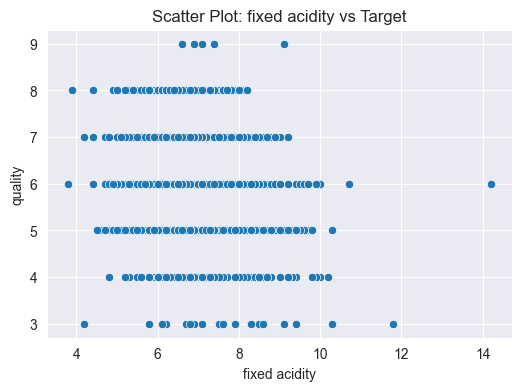

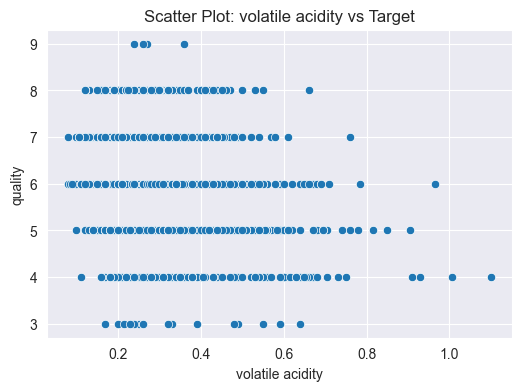

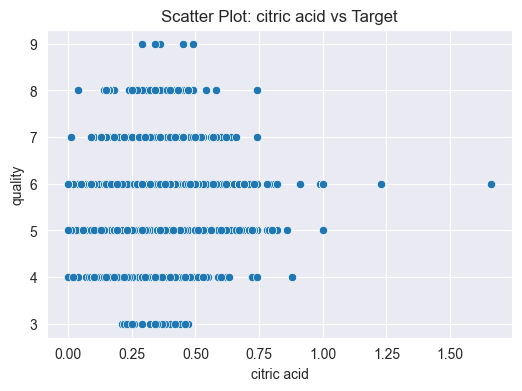

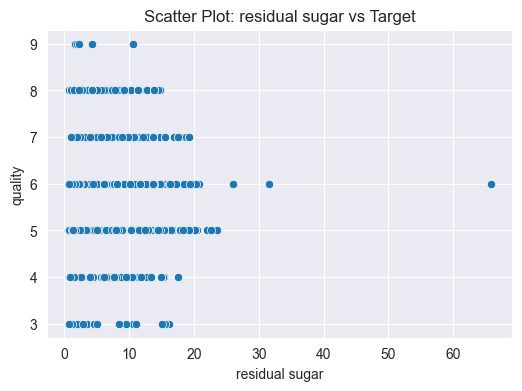

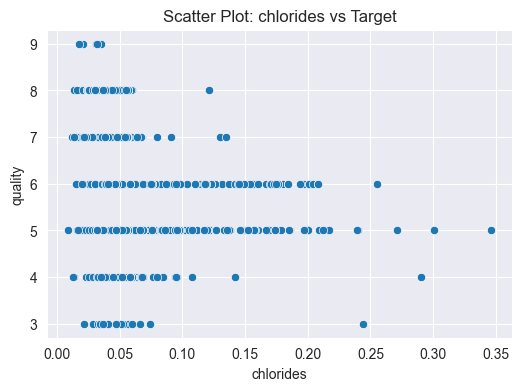

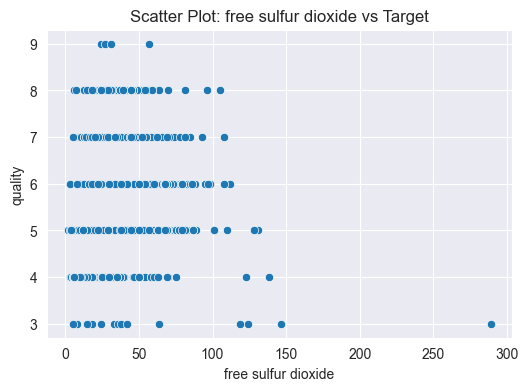

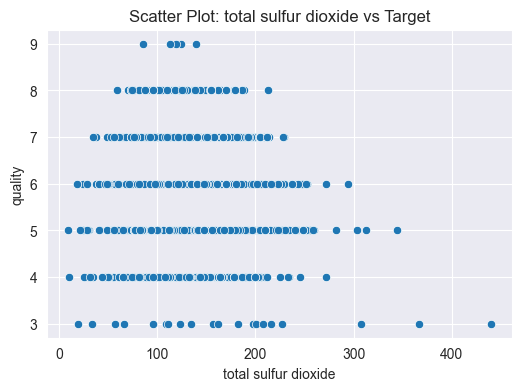

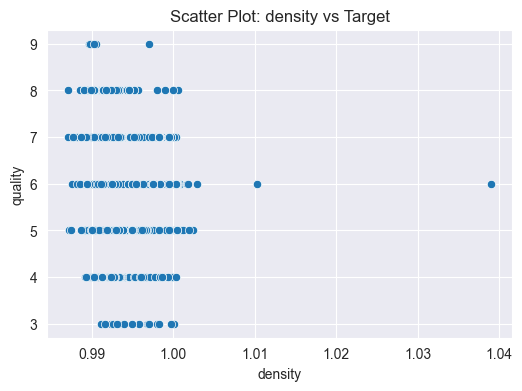

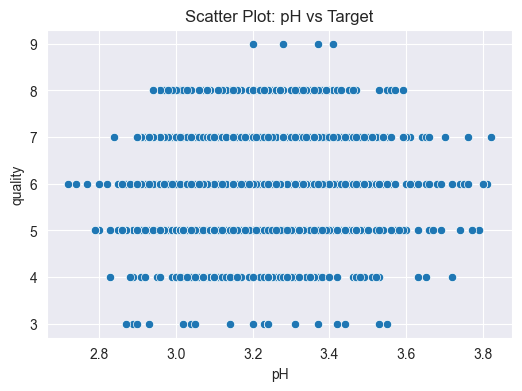

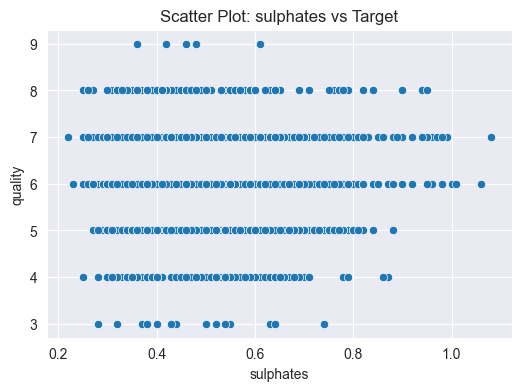

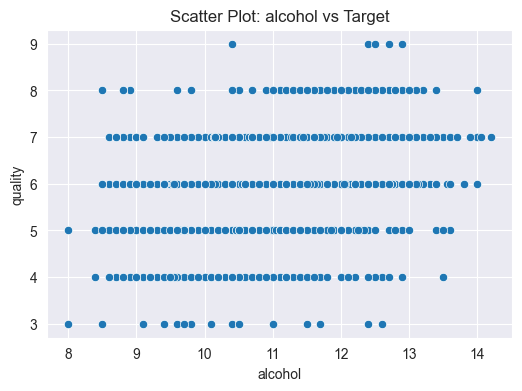

In [246]:
for col in df.columns:
    if col == 'quality':
        continue
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y='quality', data=df)
    plt.title(f'Scatter Plot: {col} vs Target')
    plt.show()

# This plots clearly show no linear relationship between the features and the target
In this case, we should look for other models that can capture the non-linear relationship

<Axes: xlabel='quality', ylabel='Count'>

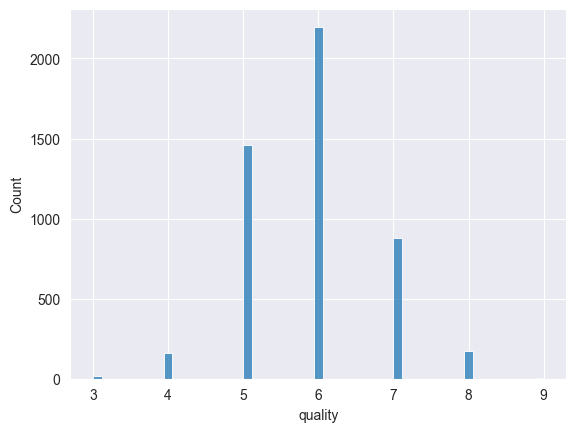

In [247]:
sns.histplot(df['quality'])

<Axes: ylabel='quality'>

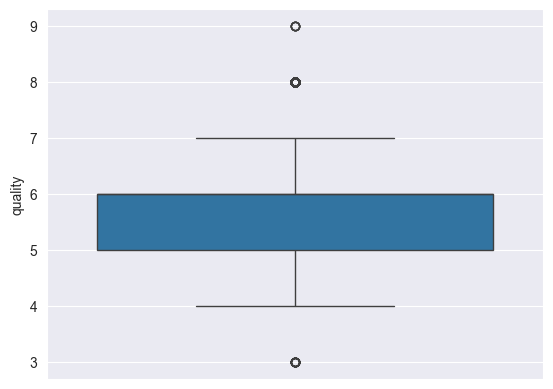

In [248]:
# Check for outliers
sns.boxplot(data=df['quality'])

In [249]:
#remove outliers with values higher or equal to 8 and lower or equal to 3
#df = df[(df['quality'] > 3) & (df['quality'] < 8)]
#sns.boxplot(data=df['quality'])

# Training without scaling the data

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [251]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.5542927330136749
R2 Score: 0.2658687132478096


# Scaling the data

In [252]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [253]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [254]:
# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [255]:
# Evaluate the model
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.5542927330136753
R2 Score: 0.2658687132478089


# Using Polynomial Features

In [256]:
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X_scaled)
X_poly_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.3, random_state=42)

In [257]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [258]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.5949262125513087
R2 Score: 0.21205182761772856


### With Polynomial features, the mse improves, but not the r2 score
This can indicate that the model is overfitting

In [259]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to check model performance
lr = LinearRegression()

scores = cross_val_score(lr, X_poly, y, cv=5, scoring='r2')
print(f'Cross-validated R² scores: {scores}')
print(f'Average R² score: {scores.mean()}')

Cross-validated R² scores: [0.26852618 0.26589534 0.3039548  0.30141514 0.11175303]
Average R² score: 0.2503088993265171


# Using Ridge and Lasso Regression

In [260]:
# Lasso
from sklearn.linear_model import Lasso

las = Lasso(alpha = 0.001, max_iter=100000)
las.fit(X_poly_scaled, y)

Lasso(alpha=0.001, max_iter=100000)

In [261]:
r2_score(y, las.predict(X_poly_scaled))

0.3662654303572017

In [262]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=0.0001)
X_train_s = scaler.fit_transform(X_train)
r.fit(X_train_s, y_train)
X_test_s = scaler.transform(X_test)
y_pred_r = r.predict(X_test_s)

print(f"Prediction value Ridge regression: {r2_score(y_test, y_pred_r)}")

Prediction value Ridge regression: 0.21205181640128157


# After using even Ridge and Lasso regression, the r2 score does not improve as expected

In [263]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test)
print(f'R² Score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R² Score: 0.47952210445411103
MSE: 0.3929775510204081


In [264]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R² Score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R² Score: 0.3602651222856319
MSE: 0.4830204081632653


In [265]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R² Score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R² Score: 0.3823830814445077
MSE: 0.46632063762890247


In [266]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R² Score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R² Score: 0.40907197827662645
MSE: 0.4461696621383446


In [270]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=500, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R² Score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R² Score: 0.5080050826072693
MSE: 0.3714719321639381
